<a href="https://colab.research.google.com/github/MaximilianoVM/DIET-COKE/blob/main/GraficasOrbitalesHidrogeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafica de las eigenfunciones del átomo de hidrogeno

Para graficar las funciones primero importamos las librerias necesarias

In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage
from skimage import measure
import matplotlib.pyplot as plt

Después definimos la función de órbital, dónde $n$ es el número cuántico principal, $l$ el eigenvalor para el momento angular total y $m$ el eigenvalor para la proyección del momento angular en $z$.

In [ ]:
def Orbital_hidrogeno(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    
    norma = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    orbital = norma*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    orbital = numpy.nan_to_num(orbital)
    return orbital

Ahora definimos el arreglo de valores donde vamos a evaluar la función orbital, para esto definimos un $z_{min}$, un $z_{max}$ y el intervalo en z ($dz$)

In [ ]:
zmin=-10
zmax=10
dz=0.5
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z) #X, Y, Z son arreglos 3d que dan el valor de x, y,z en cada puntos del espacio

Elegimos los número cuánticos (aquí debes de cambiar los valores para elegir otro orbital)

In [ ]:
n=4
l=2
m=0

Evaluamos la función Orbital en los arreglos

In [ ]:
data = Orbital_hidrogeno(n,l,m,X,Y,Z)
data = abs(data)**2

#Además calculamos la distancia R al centro para cada punto

R = numpy.sqrt(X**2+Y**2+Z**2)

<ipython-input-2-199bfcf23cc8>:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = numpy.arccos(Z/R)


## Ahora hacemos las gráficas

Primero importamos librerias para el control de gráfica

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Corte transversal del orbital a y=constante

interactive(children=(FloatSlider(value=0.0, description='Y', max=9.5, min=-10.0, step=0.5), Output()), _dom_c…

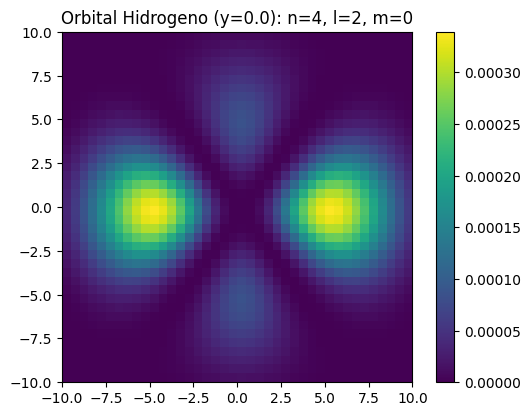

In [ ]:
def plot_func(Y):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.15, bottom=0.15)
    index = int((Y-zmin) / dz)
    #Si quieres que varíe la escala de color deja esta linea
    #im = plt.imshow(data[index,:,:], vmin=0, vmax = numpy.max(data[index,:,:]), extent=[zmin,zmax,zmin,zmax])
    #Si no quieres que varíe la escala de color cambiala por esta
    im = plt.imshow(data[index,:,:], vmin=0, vmax = numpy.max(data), extent=[zmin,zmax,zmin,zmax])
    plt.colorbar()
    ax.set_title("Orbital Hidrogeno (y="+str(Y)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
    
interact(plot_func, Y = widgets.FloatSlider(value=0.0,
                                               min=z[0],
                                               max=z[len(z)-1],
                                               step=dz))
plt.show()

### Superficie de valor constante

interactive(children=(FloatSlider(value=0.5, description='PsiPsi', max=0.998, min=0.002, step=0.0499), Output(…

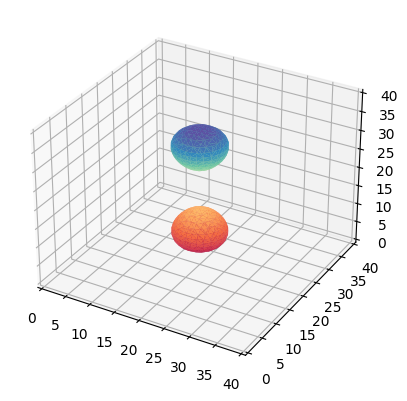

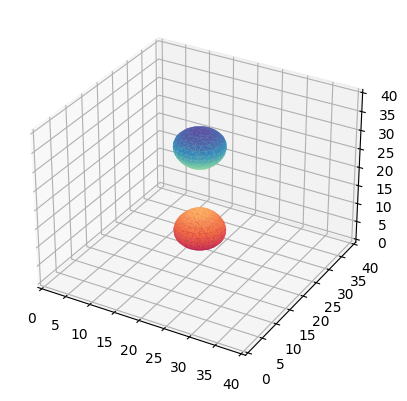

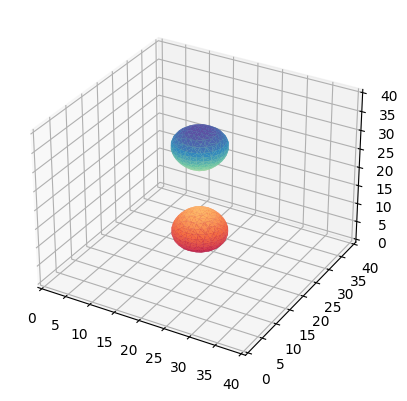

In [ ]:
max_val = numpy.max(data)

def plot_suf(PsiPsi):
    valor=PsiPsi*max_val
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([0,len(x)])
    ax.set_ylim([0,len(y)])
    ax.set_zlim([0,len(z)])
    verts, faces, _, _ = measure.marching_cubes(data, valor, spacing = (1,1,1))
    result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
 
interact(plot_suf, PsiPsi = widgets.FloatSlider(value=1/2.0,
                                               min=.002,
                                               max=.998,
                                               step=.998/20.0))
plt.show()

### Gráfica del orbital para x=0,y=0 como función de z

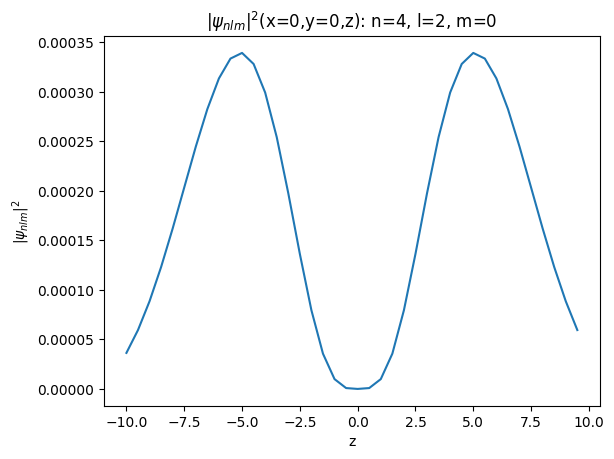

In [ ]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

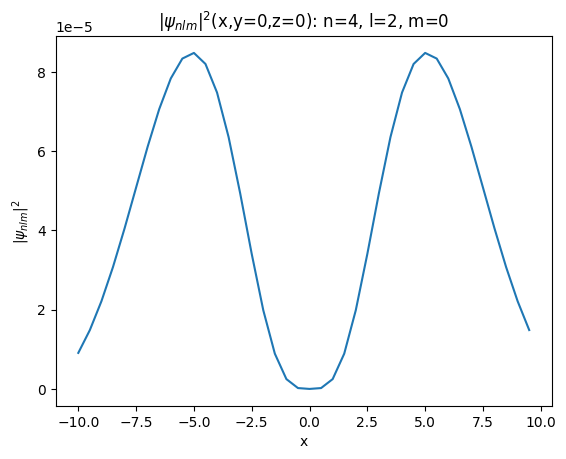

In [ ]:
plt.figure()
plt.plot(x, data[:,int(len(x)/2),int(len(x)/2)])
plt.title("$|\psi_{nlm}|^2$(x,y=0,z=0): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('x')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

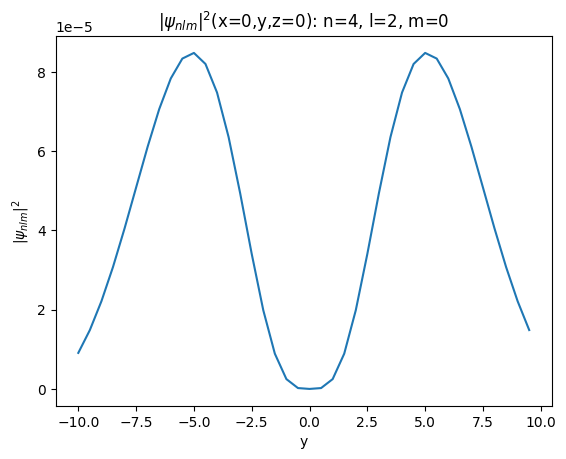

In [ ]:
plt.figure()
plt.plot(y, data[int(len(y)/2),:,int(len(y)/2)])
plt.title("$|\psi_{nlm}|^2$(x=0,y,z=0): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('y')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

### Gráfica de la densidad de probabilidad en 3D

In [ ]:
#Función de probabilidad Psi por Psi conjugada
def prob_psi(nc,nl,nm,x,y,z):
    prev=Orbital_hidrogeno(nc,nl,nm,x,y,z)
    r=numpy.real(numpy.double(prev*numpy.conj(prev)))
    return r

precision=100

def Densidad(nc,nl,nm):
    #Random coordinates
    xt=numpy.linspace(-10,10,precision)
    yt=numpy.linspace(-10,10,precision)
    zt=numpy.linspace(-10,10,precision)
    elements = []
    probability = []
    for ix in xt:
        for iy in yt:
            for iz in zt:
                #Creamos un arreglo unidimensional con estos valores
                elements.append(str((ix,iy,iz)))
                probability.append(prob_psi(nc,nl,nm,ix,iy,iz))
    #Normalizamos probabilidad is 1
    probability = probability/sum(probability)
    #Elegimos al azar algunos de estos puntos de acuerdo a la función de probabilidad
    coord = numpy.random.choice(elements, size=100000, replace=True, p=probability)
    #Le cambiamos el formato a matriz de numpy
    elem_mat = [i.split(',') for i in coord]
    elem_mat = numpy.matrix(elem_mat)
    #Creamos los arreglos de coordenadas
    x_coords = [float(i.item()[1:]) for i in elem_mat[:,0]] 
    y_coords = [float(i.item()) for i in elem_mat[:,1]] 
    z_coords = [float(i.item()[0:-1]) for i in elem_mat[:,2]]
    #Graficamos los puntos
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter(x_coords, y_coords, z_coords, alpha=0.02, s=2)
    ax.set_title("Átomo de Hidrogeno. Dendidad de probabilidad orbital n="+str(nc)+", l="+str(nl)+", m="+str(nm))
    plt.show()


NOTA: este código puede tardar VARIOS minutos, si tarda demasiado y no tienes mucho tiempo, cambia la variable presición a 30 por ejemplo.

<ipython-input-12-b3e7f81455b3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  r=numpy.real(numpy.double(prev*numpy.conj(prev)))


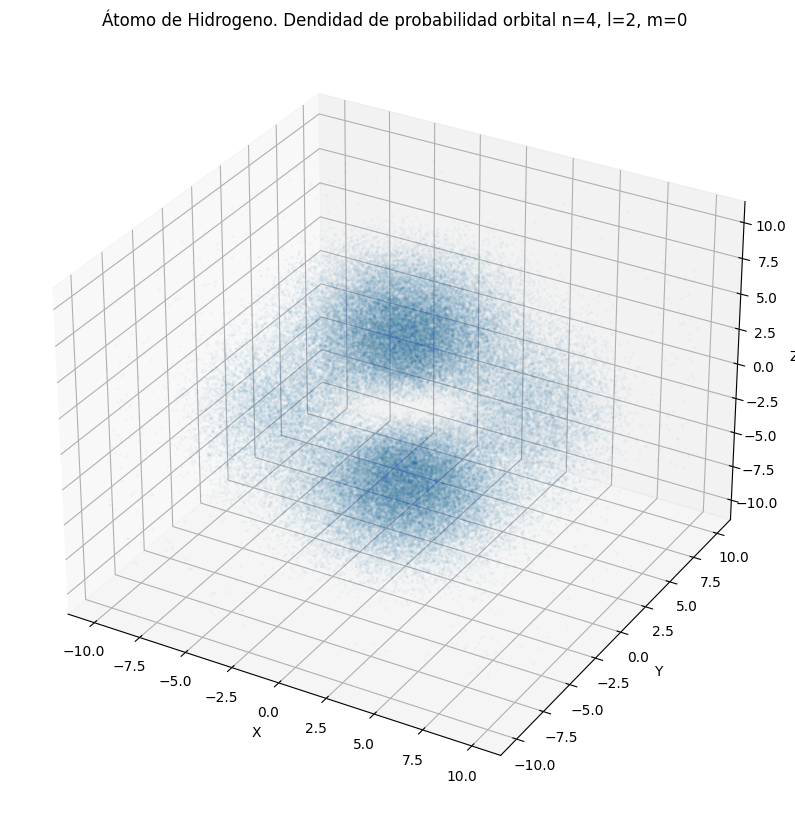

In [ ]:
Densidad(n,l,m)

<ipython-input-12-b3e7f81455b3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  r=numpy.real(numpy.double(prev*numpy.conj(prev)))


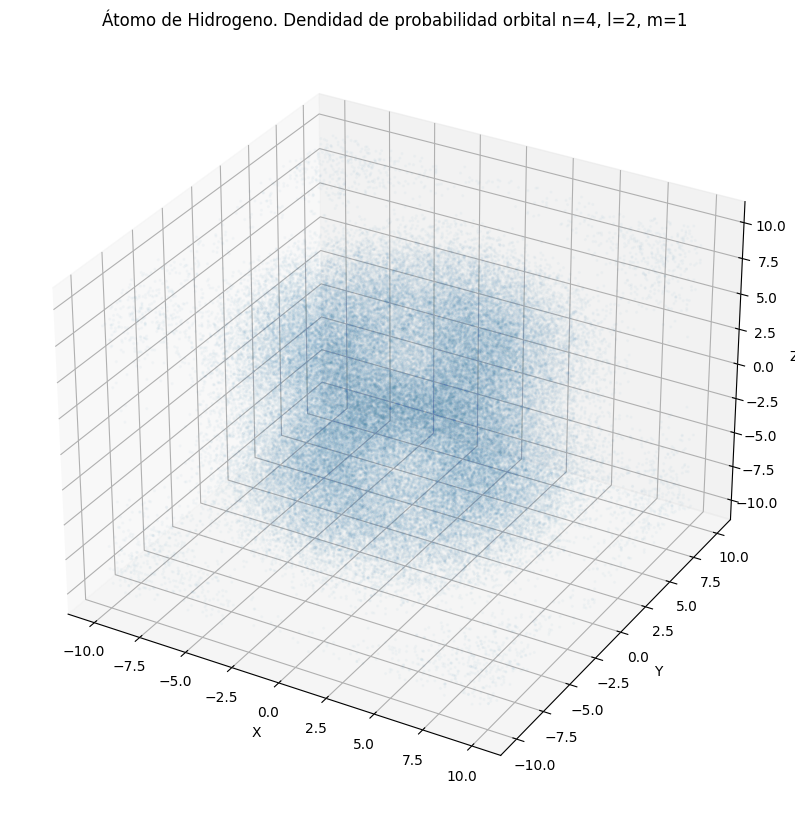

In [ ]:
Densidad(4,2,1)

<ipython-input-12-b3e7f81455b3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  r=numpy.real(numpy.double(prev*numpy.conj(prev)))


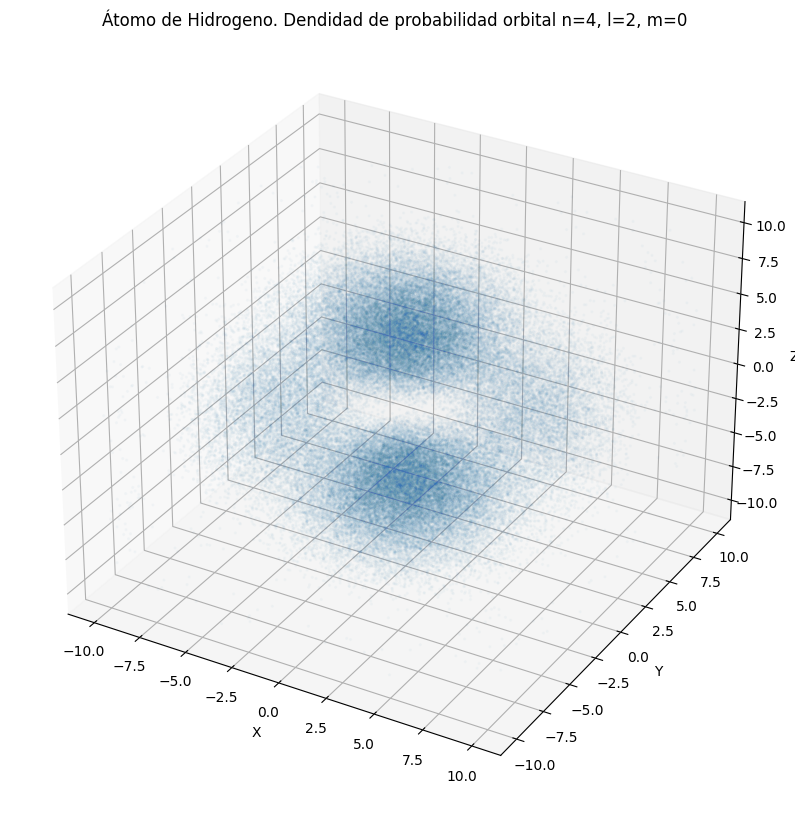

In [ ]:
Densidad(4,2,0)

<ipython-input-12-b3e7f81455b3>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  r=numpy.real(numpy.double(prev*numpy.conj(prev)))


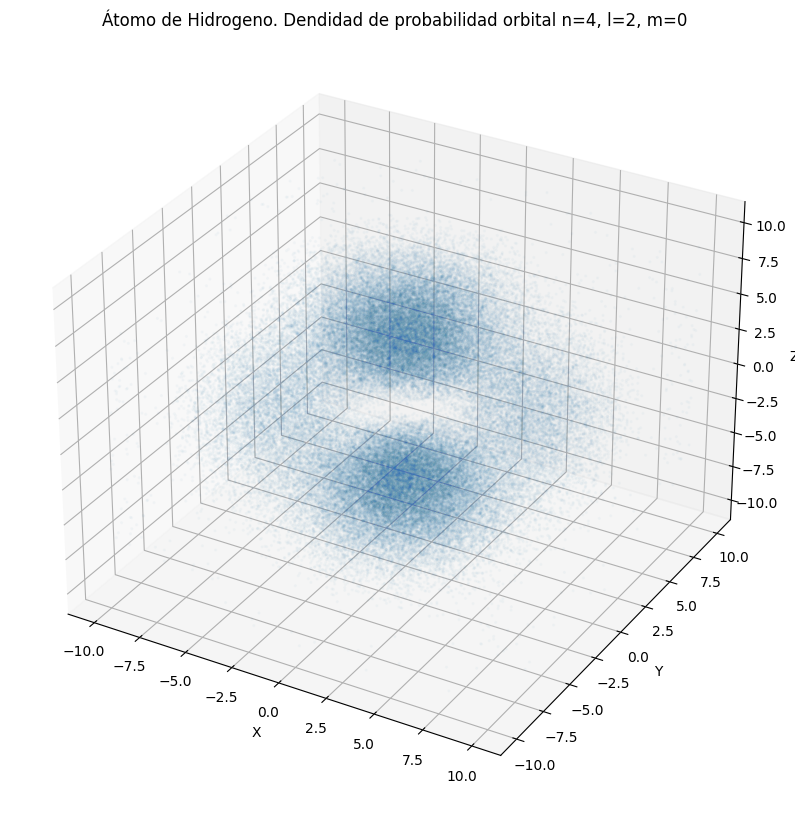

In [ ]:
Densidad(4,2,0)